Regression Project

For this project we will be working with the a dataset containing rental prices of the canadian housing market in 2024

In [3]:
#lets import the library and load the data 

import pandas as pd 
import numpy as np 

In [5]:
df=pd.read_csv('../M2P07-Regression_Project-main/canada_rent.csv')

### Exploratory Data Analysis 

Lets look a bit about what data are we gonna be working with 

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rentfaster_id      25771 non-null  int64  
 1   city               25771 non-null  object 
 2   province           25771 non-null  object 
 3   address            25646 non-null  object 
 4   latitude           25771 non-null  float64
 5   longitude          25771 non-null  float64
 6   lease_term         25725 non-null  object 
 7   type               25771 non-null  object 
 8   price              25771 non-null  float64
 9   beds               25639 non-null  object 
 10  baths              25637 non-null  object 
 11  sq_feet            21659 non-null  object 
 12  link               25771 non-null  object 
 13  furnishing         25771 non-null  object 
 14  availability_date  25759 non-null  object 
 15  smoking            23069 non-null  object 
 16  cats               255

In [39]:
df.head()

rentfaster_id     city province           address   latitude   longitude  \
0         468622  Airdrie  Alberta  69 Gateway Dr NE  51.305962 -114.012515   
1         468622  Airdrie  Alberta  69 Gateway Dr NE  51.305962 -114.012515   
2         468622  Airdrie  Alberta  69 Gateway Dr NE  51.305962 -114.012515   
3         468622  Airdrie  Alberta  69 Gateway Dr NE  51.305962 -114.012515   
4         468622  Airdrie  Alberta  69 Gateway Dr NE  51.305962 -114.012515   

  lease_term       type   price    beds baths sq_feet  \
0  Long Term  Townhouse  2495.0  2 Beds   2.5    1403   
1  Long Term  Townhouse  2695.0  3 Beds   2.5    1496   
2  Long Term  Townhouse  2295.0  2 Beds   2.5    1180   
3  Long Term  Townhouse  2095.0  2 Beds   2.5    1403   
4  Long Term  Townhouse  2495.0  2 Beds   2.5    1403   

                                                link   furnishing  \
0  /ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...  Unfurnished   
1  /ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...  Unfurnished   
2  /ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...  Unfurnished   
3  /ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...  Unfurnished   
4  /ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...  Unfurnished   

  availability_date      smoking  cats  dogs  
0         Immediate  Non-Smoking  True  True  
1         Immediate  Non-Smoking  True  True  
2         Immediate  Non-Smoking  True  True  
3       November 18  Non-Smoking  True  True  
4         Immediate  Non-Smoking  True  True

Lets look at the missing values in our data set :


In [42]:
df.isnull().sum()

rentfaster_id           0
city                    0
province                0
address               125
latitude                0
longitude               0
lease_term             46
type                    0
price                   0
beds                  132
baths                 134
sq_feet              4112
link                    0
furnishing              0
availability_date      12
smoking              2702
cats                  173
dogs                  173
dtype: int64

So we gonna be working with 25 771 listing accross 18 columns. 
The price is our target variable. We can see that some features are stored as object and should be converted into numerical format 
(such as 'sq_feet', 'baths', 'beds, 'smokers'...)

We have a huge number of missing values for 'sq_feet' which is an important features for the analysis, we cannot simply drop all hose rows.
Same for 'bed' and 'baths', those are features most buyers look in order to take their decisions based on that.  
So lets replace the null values by their medians in order to continue our analysis. 


In [59]:
#since they are object we need to convert them in float 
df['beds'] = df['beds'].astype(str).str.extract(r'(\d+)')  # Extraction des chiffres
df['baths'] = df['baths'].astype(str).str.extract(r'(\d+\.?\d*)')

# Convert in Float
df['beds'] = pd.to_numeric(df['beds'], errors='coerce')  
df['baths'] = pd.to_numeric(df['baths'], errors='coerce')
df['sq_feet'] = pd.to_numeric(df['sq_feet'], errors='coerce')

# Lets check that the conversion was successfull
print("\nTypes de données après conversion :")
print(df.dtypes)



Types de données après conversion :
rentfaster_id          int64
city                  object
province              object
address               object
latitude             float64
longitude            float64
lease_term            object
type                  object
price                float64
beds                   int64
baths                float64
sq_feet              float64
link                  object
furnishing            object
availability_date     object
smoking               object
cats                  object
dogs                  object
dtype: object


In [65]:
# Everything is conversed perfectly, we gonna replace the missing values with the median 
df['beds'] = df['beds'].fillna(df['beds'].median())
df['baths'] = df['baths'].fillna(df['baths'].median())
df['sq_feet'] = df['sq_feet'].fillna(df['sq_feet'].median())

# Checking missing values after replacement 
print("\nMissing values after replacement :")
print(df.isnull().sum())


Missing values after replacement :
rentfaster_id           0
city                    0
province                0
address               125
latitude                0
longitude               0
lease_term             46
type                    0
price                   0
beds                    0
baths                   0
sq_feet                 0
link                    0
furnishing              0
availability_date      12
smoking              2702
cats                  173
dogs                  173
dtype: int64


Now we have to encodre the categorical data to be bale to be working with 

In [72]:
#here are the categorical columns we need to encode 
categorical_columns = ['type', 'province', 'furnishing', 'lease_term']
print("Categorical columns :", df[categorical_columns].head())

# One hot encoding 
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


Categorical columns :         type province   furnishing lease_term
0  Townhouse  Alberta  Unfurnished  Long Term
1  Townhouse  Alberta  Unfurnished  Long Term
2  Townhouse  Alberta  Unfurnished  Long Term
3  Townhouse  Alberta  Unfurnished  Long Term
4  Townhouse  Alberta  Unfurnished  Long Term


In [78]:
# Lets check after encoding 
print("\nColonnes après encodage :")
print(df_encoded.columns)


Colonnes après encodage :
Index(['rentfaster_id', 'city', 'address', 'latitude', 'longitude', 'price',
       'beds', 'baths', 'sq_feet', 'link', 'availability_date', 'smoking',
       'cats', 'dogs', 'type_Apartment', 'type_Basement', 'type_Condo Unit',
       'type_Duplex', 'type_House', 'type_Loft', 'type_Main Floor',
       'type_Mobile', 'type_Office Space', 'type_Parking Spot',
       'type_Room For Rent', 'type_Storage', 'type_Townhouse',
       'type_Vacation Home', 'province_British Columbia', 'province_Manitoba',
       'province_New Brunswick', 'province_Newfoundland and Labrador',
       'province_Northwest Territories', 'province_Nova Scotia',
       'province_Ontario', 'province_Quebec', 'province_Saskatchewan',
       'furnishing_Negotiable', 'furnishing_Unfurnished',
       'furnishing_Unfurnished, Negotiable', 'lease_term_6 months',
       'lease_term_Long Term', 'lease_term_Negotiable',
       'lease_term_Short Term', 'lease_term_months'],
      dtype='object')


In [94]:
#Now we need to encode the others categorical variable such  as smoking, cats and dogs
# Convert 'smoking' to binary (0 = Non-Smoking, 1 = Smoking)
df_encoded['smoking'] = df_encoded['smoking'].map({'Non-Smoking': 0, 'Smoking': 1})

# Convert 'cats' and 'dogs' to binary (1 = Allowed, 0 = Not Allowed)
df_encoded['cats'] = df_encoded['cats'].map({'True': 1, 'False': 0})
df_encoded['dogs'] = df_encoded['dogs'].map({'True': 1, 'False': 0})

# Replace NaN values in 'smoking', 'cats', and 'dogs' with 0 (assuming no pets allowed if missing)
df_encoded[['smoking', 'cats', 'dogs']] = df_encoded[['smoking', 'cats', 'dogs']].fillna(0)

Everything looks fine, we gonna be able to pursue the analysis with some some visuals to better understand the dataset


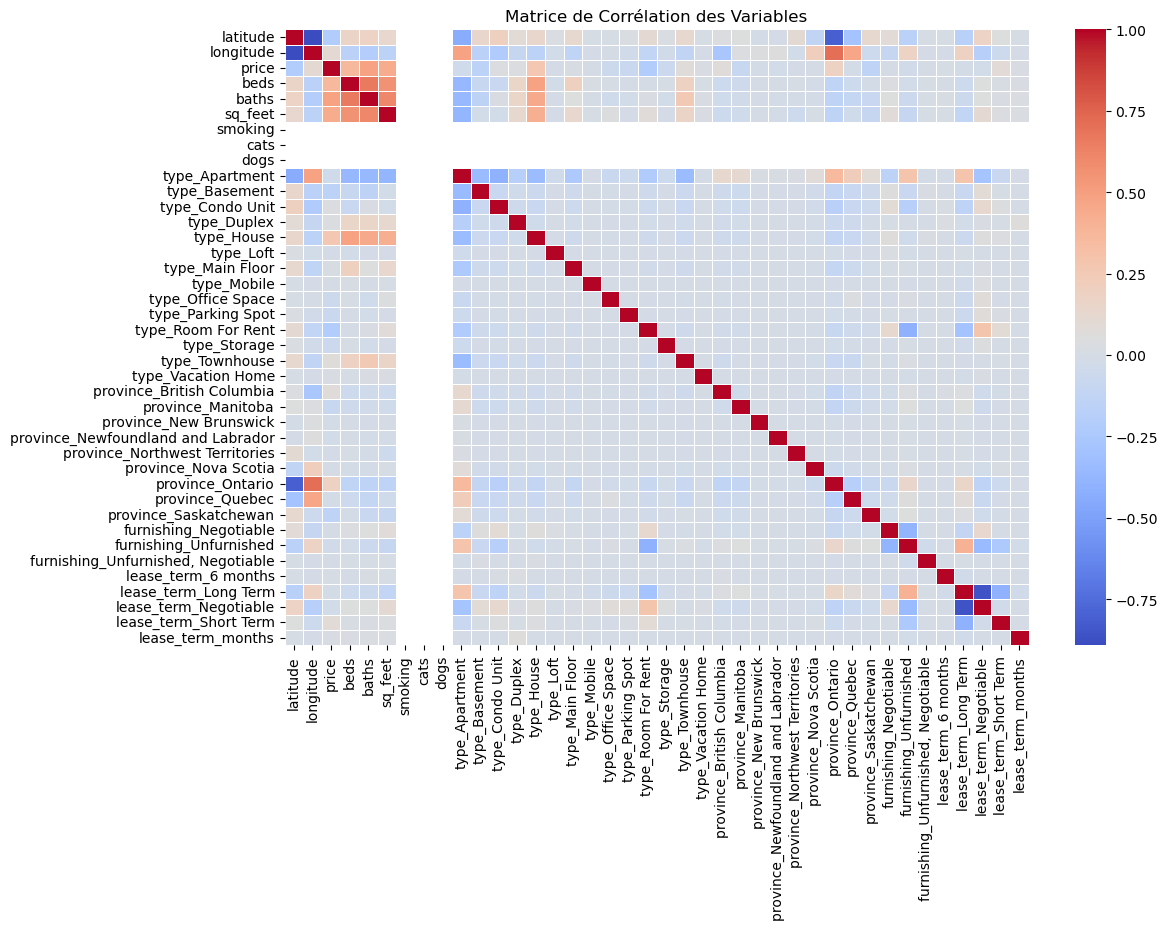

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt 

# Supprimer les colonnes non pertinentes pour la corrélation
df_corr = df_encoded.drop(columns=['rentfaster_id', 'city', 'address', 'link', 'availability_date'])

# Spearman correlation 
correlation_matrix = df_corr.corr()

# We gonna use the heatmap to showcase our results 
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [96]:
# Now lets see which features we are goona be working with (those that are have the highest correlation with the price)
print("Top 10 variables with highest price correlation :")
print(correlation_matrix['price'].abs().sort_values(ascending=False).head(10))


Top 10 variables with highest price correlation :
price                    1.000000
baths                    0.484711
sq_feet                  0.431768
beds                     0.361058
type_House               0.274034
type_Room For Rent       0.214710
latitude                 0.214687
province_Ontario         0.188080
type_Basement            0.159739
province_Saskatchewan    0.140717
Name: price, dtype: float64


## Observation 

So not surprising, the features most correlated to the prices are : 'baths','sq-feet', 'beds', 'type_House', 'type_Room For Rent', 
'latitude', 'province_Ontario'. 

Baths and Square Feet has the higher score because the bigger a house is the more expensive it is.

Type_house is normal becuase a House cost more than an appartement.

Type_Room For Rent has an inverted correlation because living with other split the costing price.

Province Ontario does make sens,  probably due to house pricing thats really high in toronto). 

### Feature Engineering

We're gonna create a new variable that could help our model :

Price_per_sqft = price/sq_feet, which will allows us to evaluate the price per square feet. 
It will allow us to compare housing with different size, and is overall a good indicator of a house price. 

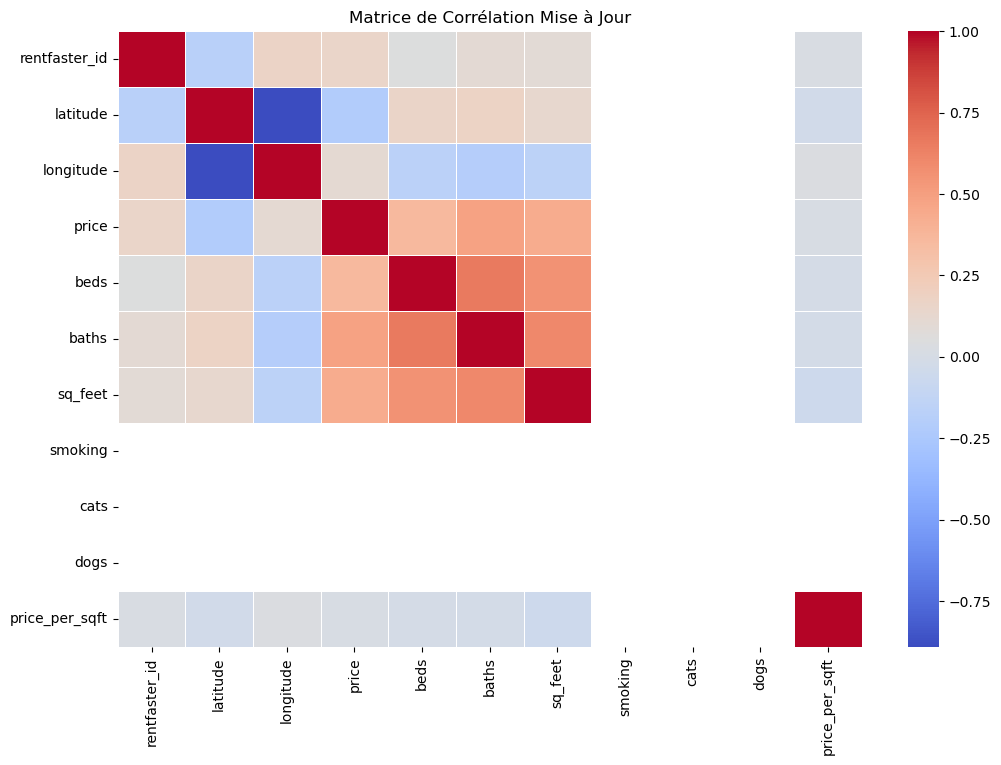


Top 10 des variables les plus corrélées avec le prix :
price             1.000000
baths             0.484711
sq_feet           0.431768
beds              0.361058
latitude          0.214687
rentfaster_id     0.150541
longitude         0.109689
price_per_sqft    0.012982
smoking                NaN
cats                   NaN
Name: price, dtype: float64


In [111]:
# So let's start by creating the 'price_per_sqft' feature
df_encoded['price_per_sqft'] = df_encoded['price'] / df_encoded['sq_feet']

# Replace infinite values & fill NaN without 'inplace=True'
df_encoded['price_per_sqft'] = df_encoded['price_per_sqft'].replace([float('inf'), -float('inf')], df_encoded['price_per_sqft'].median())
df_encoded['price_per_sqft'] = df_encoded['price_per_sqft'].fillna(df_encoded['price_per_sqft'].median())

# We want to keep only the numerical columns that we will be working with 
#We create a datafame with only numerical columns 
df_numeric = df_encoded.select_dtypes(include=['number'])  

# We gonna use the spearman matrix 
correlation_matrix = df_numeric.corr()

# And we gonna use the heatmap like previously to show our results to ensure everything make sens 
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [113]:
# Display top 10 most correlated variables with price
print("Top 10 variables with highest price correlation:")
print(correlation_matrix['price'].abs().sort_values(ascending=False).head(10))

Top 10 variables with highest price correlation:
price             1.000000
baths             0.484711
sq_feet           0.431768
beds              0.361058
latitude          0.214687
rentfaster_id     0.150541
longitude         0.109689
price_per_sqft    0.012982
smoking                NaN
cats                   NaN
Name: price, dtype: float64


### Observation 

Baths and sq_feet are still highly correlated, but it seems we have an issue with the new feature we tried to install. 
It is relatively low compared to what we expected (0.012982), this suggests that price_per_sqft is not strongly influencing the rental price which is unusual. 

In [122]:
#Since 'cats' and 'moking' appears as Nan, those features might have issues. 
df_encoded[['smoking', 'cats']] = df_encoded[['smoking', 'cats']].fillna(0)
print(df_encoded['sq_feet'].describe())

count    25771.00000
mean       870.28458
std        453.80596
min          0.00000
25%        648.00000
50%        800.00000
75%        965.00000
max      11700.00000
Name: sq_feet, dtype: float64


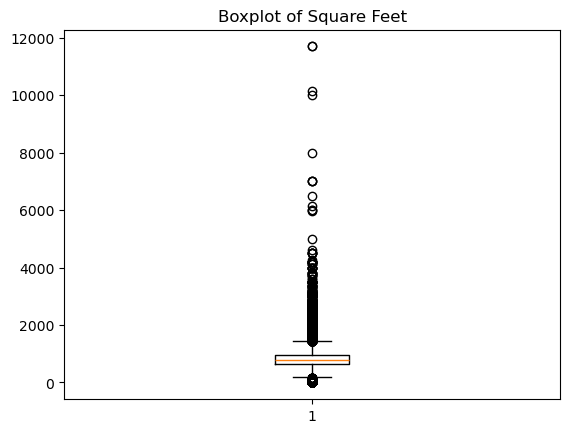

In [124]:
#Lets visualize it 
plt.boxplot(df_encoded['sq_feet'])
plt.title("Boxplot of Square Feet")
plt.show()

The mean of 870,28 square feet and the median of 800 sqft are reasonable but it seams that we have several issues. 

The minimum of 0 sqft is a problem ( some listing a probably missing valid values).

The 75% percentile shows 965sqft and most avlues are below 1000sqft, so extremely high values might errors, or outliers. 

We gonna try to remove the listing where swaft == 0 (since a property of 0 sqft is not realistic), and we gonna cap the extreme values (≥6000 sqft seems reasonable to include also some of higher housing to keep the model realistic while removing the outliers).

In [137]:
# Remove listings where 'sq_feet' is 0
df_encoded = df_encoded.loc[df_encoded['sq_feet'] > 0].copy()  

# Cap 'sq_feet' at 3000 sqft (remove extreme outliers)
df_encoded.loc[df_encoded['sq_feet'] > 6000, 'sq_feet'] = 6000

# Recalculate 'price_per_sqft' using .loc[]
df_encoded.loc[:, 'price_per_sqft'] = df_encoded['price'] / df_encoded['sq_feet']

# Replace infinite values & fill NaN
df_encoded.loc[:, 'price_per_sqft'] = df_encoded['price_per_sqft'].replace([float('inf'), -float('inf')], df_encoded['price_per_sqft'].median())
df_encoded.loc[:, 'price_per_sqft'] = df_encoded['price_per_sqft'].fillna(df_encoded['price_per_sqft'].median())

# Recompute correlation matrix
correlation_matrix = df_encoded.select_dtypes(include=['number']).corr()

# Display updated top 10 correlations
print("\nUpdated Top 10 Most Correlated Variables with Price:")
print(correlation_matrix['price'].abs().sort_values(ascending=False).head(10))


Updated Top 10 Most Correlated Variables with Price:
price             1.000000
baths             0.481472
sq_feet           0.387945
beds              0.367680
latitude          0.223486
rentfaster_id     0.132654
longitude         0.118348
price_per_sqft    0.013090
smoking                NaN
cats                   NaN
Name: price, dtype: float64


### Observation 

So the Data Cleaning worked. 'Baths', 'sq_feet' and 'beds' remain the strongest indicators of price and extreme outliers have been removed 

Nonetheless, 'price_per_sqft' remains a weak indicator of price in the data set,

this could be caused by a high variation in the rental market (some provinces might have a huge price differences regardless of size (a small house in Toronto could cost more that a large house in Saskatchewan). 

Since it has a very low correlation, we might exclude it from our regression model. 

In [152]:
#drop the feature 'price_per_sqft'
df_encoded = df_encoded.drop(columns=['price_per_sqft'])

In [333]:
print("\nData type in X_train :")
print(X_train.dtypes.value_counts())

# Iddentify non numerical 
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns
print("/nNonnumerical detected :", list(non_numeric_cols))

# Si des colonnes non numériques existent, les supprimer
if len(non_numeric_cols) > 0:
    print("\nRemove non numerical")
    X_train = X_train.drop(columns=non_numeric_cols)
    X_test = X_test.drop(columns=non_numeric_cols)

# Vérifier à nouveau les types
print("\nData ttype after removal:")
print(X_train.dtypes.value_counts())


Data type in X_train :
float64    7
int64      2
Name: count, dtype: int64
/nNonnumerical detected : []

Data ttype after removal:
float64    7
int64      2
Name: count, dtype: int64


### Regression Modeling 

Now that the data set is clean we can Split the data set into training and test sets, train multiple regression models and compare their performance to fit the best one. 

In [319]:
from sklearn.model_selection import train_test_split

# Define the features for X and y 
X = df_encoded.drop(columns=['price'])  # Remove the dependent variable 
y = df_encoded['price']  # defining the dependent variable 

# Split the dataset in 80%/20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the set sizes 
print("Size of training set is:", X_train.shape)
print("Size of test set is:", X_test.shape)

Size of training set is: (20092, 44)
Size of test set is: (5023, 44)


### Comparing models 

So the next step is to compare the regression models to know which one we're gonna use : 

Linear Regression model is fast and easy to interpret, althought he can only captures lineare relations between variables. 

Random Forest is stronger and have lesser risks of overfitting but can be slow if there is many trees. 

Gradient Boosting is very performing and help correct mistakes but can be slower to train and can sensible to overfitting. 

With those three model, I feel like having a solid palette of choice to pursue the prediction afterwards. 

In [322]:
#lets import the librarys we're gonna use 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#lets first start by defining models 
linear_reg = LinearRegression()
random_forest = RandomForestRegressor(n_estimators=50, random_state=42)
gradient_boosting = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=42)


In [324]:
# Here we gonna train and evaluate the models 

#variable to stock the results 
results = []

#we gonna write a function to train eahc model and show their performance indicators 

def train_and_evaluate(model, model_name):
    print(f'Training model:{model_name}')

    #training model:
    model.fit(X_train, y_train)

    #predicition for model:
    y_pred= model.predict(X_test)

    #print every performance indicator (metrics):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    #show the performance indicators 
    print(f'Mean Absolute error for {model_name} is : {mae}')
    print(f'Mean Squared Error for {model_name} is : {mse}')
    print(f'Root Mean Squared error for {model_name} is : {rmse}')
    print(f'R2 score for {model_name} is : {r2}')

    #visualize the performance indicators 
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, label='Prédictions')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal (y = x)')
    plt.xlabel("Test Values")
    plt.ylabel("Predictions Values")
    plt.title(f"Predictions Values vs Test Values ({model_name})")
    plt.legend()
    plt.show()

    #And here we're gonna store the performance indicators in a list to compare them after wards
    results.append({"Model": model_name, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2})

# Linear Regression Model 


Training model:Linear Regression
Mean Absolute error for Linear Regression is : 435.5240504525398
Mean Squared Error for Linear Regression is : 415377.38605746307
Root Mean Squared error for Linear Regression is : 644.4977781633255
R2 score for Linear Regression is : 0.41299770910206046


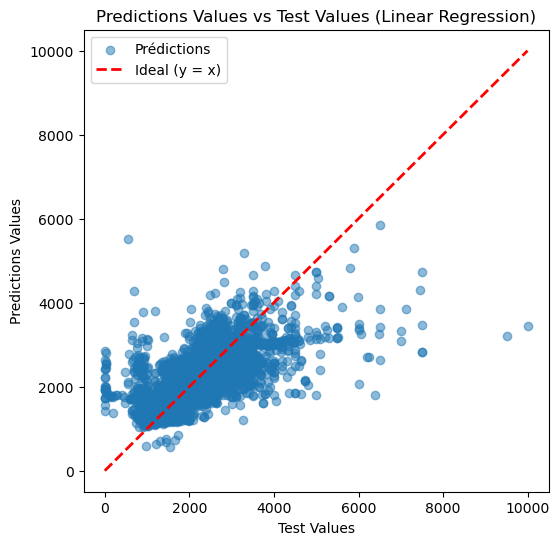

In [331]:
train_and_evaluate(linear_reg, "Linear Regression")

## Observation 

So the red line showcase the ideal situations where our predictions would be perfectly equal to our Test values, we notice also that a majority of those points are under the line which suggest that our model is underestimating the prices. 

We can also see the that the points are scattered, it is clearer with the higher values which presume our model cannot predict precisly for higher values in our data set. The hihgher the values the stronger the mistake which suggest that it is underfitting. 

The majority of our points are compressed our 1000 and 4000 around the Ideal line, that shows that our model is learning better around those values but struggle to generalize it for higher values. 

It is very likely that the Linear Regression model is too simple to capture the complexity of our data set. 

# Random Forest 

Training model:Random Forest
Mean Absolute error for Random Forest is : 188.31552550279903
Mean Squared Error for Random Forest is : 192060.92377894412
Root Mean Squared error for Random Forest is : 438.24755992354835
R2 score for Random Forest is : 0.7285836782780024


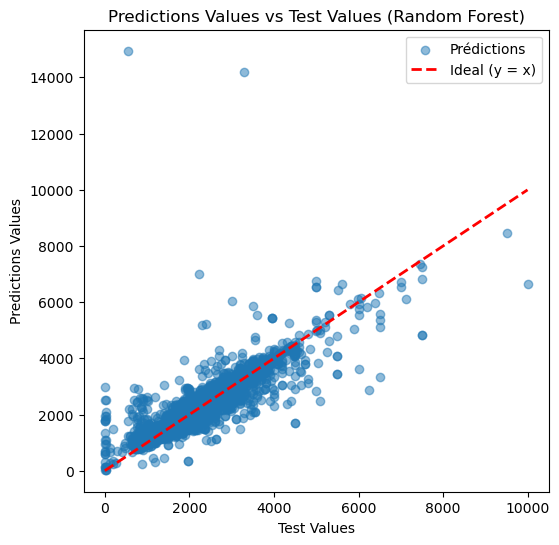

In [225]:
train_and_evaluate(random_forest, "Random Forest")

### Observation 

We can see here that the our model follow better our Ideal line than the Linear Regression model, that means that this model capture better the relations between the variable.

The points are more scattered around the red line, so it can generalize better over different price range.

Althought, for price over 6000$, we can see that points are still highly scattered, which suggest that our model still struggles with higher values. 
Some predictions those not get close to our line, either higher or under. 

Overall it is better that the Linear Regression model, but still can be imporved. 

# Gradient Boosting

Training model:Gradient Boosting
Mean Absolute error for Gradient Boosting is : 347.58884578575265
Mean Squared Error for Gradient Boosting is : 330781.880360958
Root Mean Squared error for Gradient Boosting is : 575.1364015265926
R2 score for Gradient Boosting is : 0.532546238488416


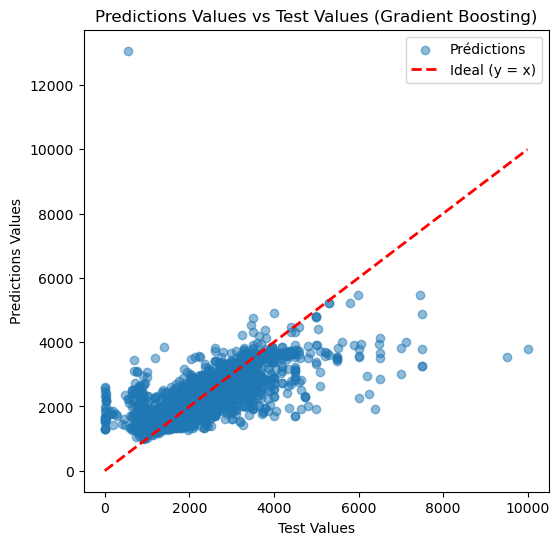

In [231]:
train_and_evaluate(gradient_boosting, "Gradient Boosting")

### Observation




Simliar to Random Forest, GradientBoosting shows a good alignement with our Ideal line, wich suggest that it has a good capacity to learn the tendencies in our data set. 

Most of our point are not too far from the real values, means that Gradient modelis better than Linear Regression to understand the complexity of the relations between our variables. 

We still have a problem with higher values are very scattered when the price is over 6000$ which suggest that it underestimate those values. 

So Gradient Boosting seems less scattered that RandomForest, have a higher precision but still make mistakes around hihgher values and still follow our ideal line. 

### Metrics/Performcance indicators 

In [245]:
results_df = pd.DataFrame(results)

results_df

Model         MAE            MSE        RMSE        R2
0  Linear Regression  435.524050  415377.386057  644.497778  0.412998
1      Random Forest  188.315526  192060.923779  438.247560  0.728584
2  Gradient Boosting  347.588846  330781.880361  575.136402  0.532546

Random Forest seems to be the most performing model. 

It has both the lowest mean squared error and root mean squared error. 

It has the higher R2 score which means that aroud 73% explain a variation in price. 

So we're gonn go with the RandomForest to better its results. 


# Optimisation

In [277]:
from sklearn.model_selection import GridSearchCV

#define the hyperparameter 
param_grid = {
    'n_estimators':[50, 100, 200], #--≥ number or trees 
    'max_depth':[None, 10, 20], #depth of trees
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

#RandomForest Model
rf = RandomForestRegressor(random_state=42) 

#Cross Validation with 3 folds
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

#Show the best parameter found 
print("Best parameters :", grid_search.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Observations on the Best Hyperparameters for Random Forest

After performing hyperparameter tuning using GridSearchCV, we found that the optimal parameters for our Random Forest model are:

max_depth=None → The trees are fully grown, allowing the model to capture complex patterns in the data.

min_samples_leaf=1 → Each leaf node contains at least one sample, preventing unnecessary pruning and allowing flexibility.

min_samples_split=2 → A node splits if it has at least two samples, ensuring detailed tree structures.

n_estimators=200 → The model uses 200 decision trees, increasing stability and reducing variance.

These hyperparameters suggest that a deep and complex model provides the best predictive performance, capturing intricate relationships in rental prices. The high number of trees enhances generalization, while keeping min_samples_leaf and min_samples_split small ensures that the model remains sensitive to variations in the data.

# Training new model 


In [287]:
best_model = RandomForestRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)

#model training
best_model.fit(X_train, y_train)

#make prediction on the set 
y_pred_optimized = best_model.predict(X_test)

#Print all the performance indicators/metrics 
mae_opt = mean_absolute_error(y_test, y_pred_optimized)
mse_opt = mean_squared_error(y_test, y_pred_optimized)
rmse_opt = np.sqrt(mse_opt)
r2_opt = r2_score(y_test, y_pred_optimized)

print('New Model Performance Indicators/metrics:')
print(f'MAE : {mae_opt}')
print(f'MSE : {mse_opt}')
print(f'MRSE : {rmse_opt}')
print(f'R2 : {r2_opt}')

New Model Performance Indicators/metrics:
MAE : 185.3756013549377
MSE : 196489.3710029307
MRSE : 443.2712160776185
R2 : 0.7223254929437601


In [301]:
#Lets compare it side by side 
old_metrics = {
    "Model": "Random Forest (Before Tuning)",
    "MAE": 188.32,
    "MSE": 192060.92,
    "RMSE": 438.25,
    "R2": 0.7286
}

# New metrics 
new_metrics = {
    "Model": "Random Forest (After Tuning)",
    "MAE": 185.38,
    "MSE": 196489.37,
    "RMSE": 443.27,
    "R2": 0.7223
}

# Dataframe to copmare them
df_comparison = pd.DataFrame([old_metrics, new_metrics])

df_comparison

Model     MAE        MSE    RMSE      R2
0  Random Forest (Before Tuning)  188.32  192060.92  438.25  0.7286
1   Random Forest (After Tuning)  185.38  196489.37  443.27  0.7223

After optimizing the Random Forest Model using GridSearchCV, we compared the performance mectrics before and after tuninf to evaluate the impact of the hyper parameter optimization. 

We can notice a slight imporvement in MAE, meaning that on average the model's prediction are slightly closer to the actual rental prices. 

There's a slight increase in MSE and RMSE, this suggest that a few large errors (outliers) have a greater impact on the model after tuning. 

And finaly we can see that there a slight decrease in the R2 score, meaning the model explains a slightly lower proportion of the variance in rental prices. 

To conclude the optimization did not significantly improve the overall performance of the model. 
The slight decrease in R2 and increase in RMSE suggets that the model may have lost some generalization ability. 
The small improvement in MAE shows that the model is slightly more precise on average but outliers might have impacted the error distribution. 

Since the improvements are minimal and some metrics slightly worsened, we can keep the optimized model but consider further tuning (e.g., feature engineering or different preprocessing)

# Make predictions 



Here we gonna try to predict the price of those appartement listed on rentfaster.ca to evaluate our model prediction. 

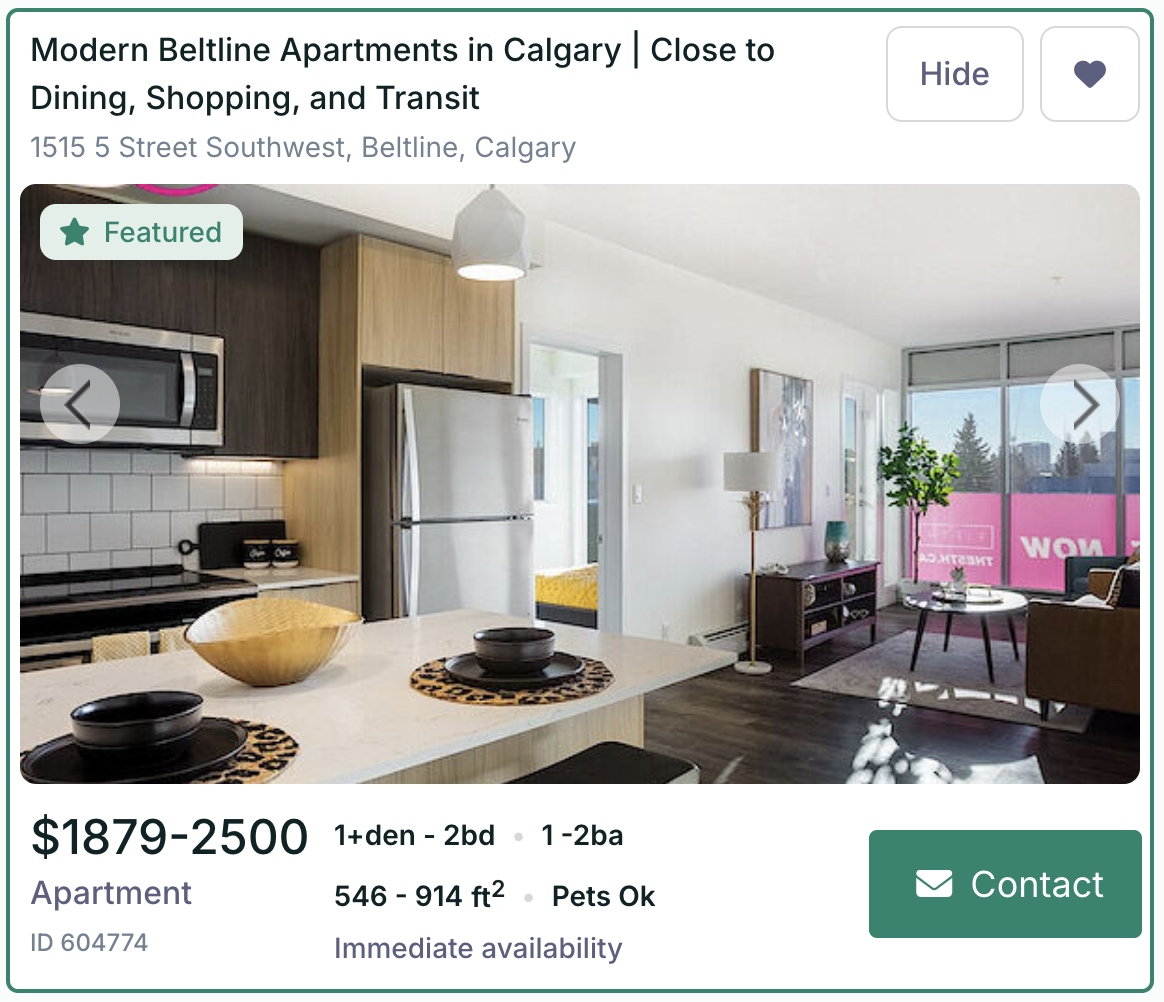
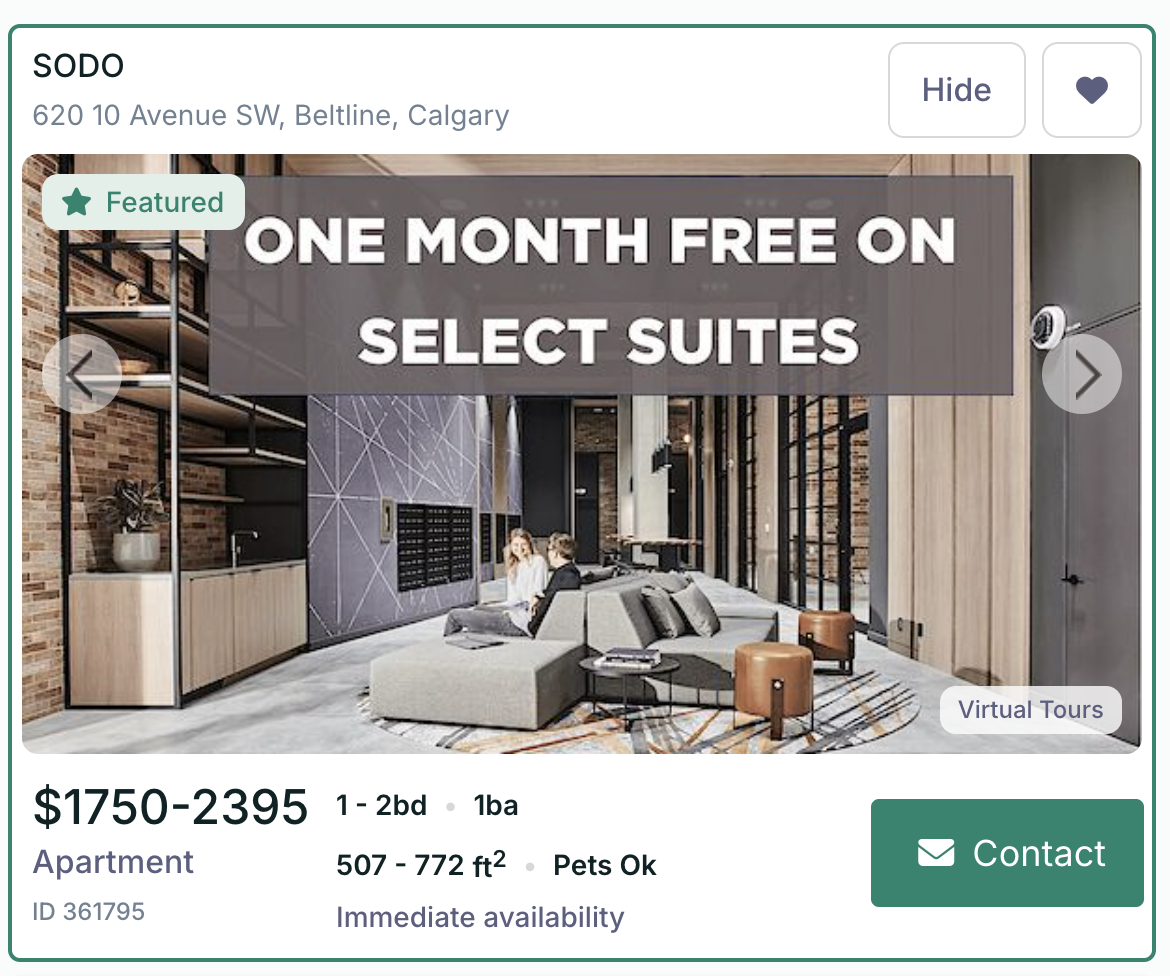
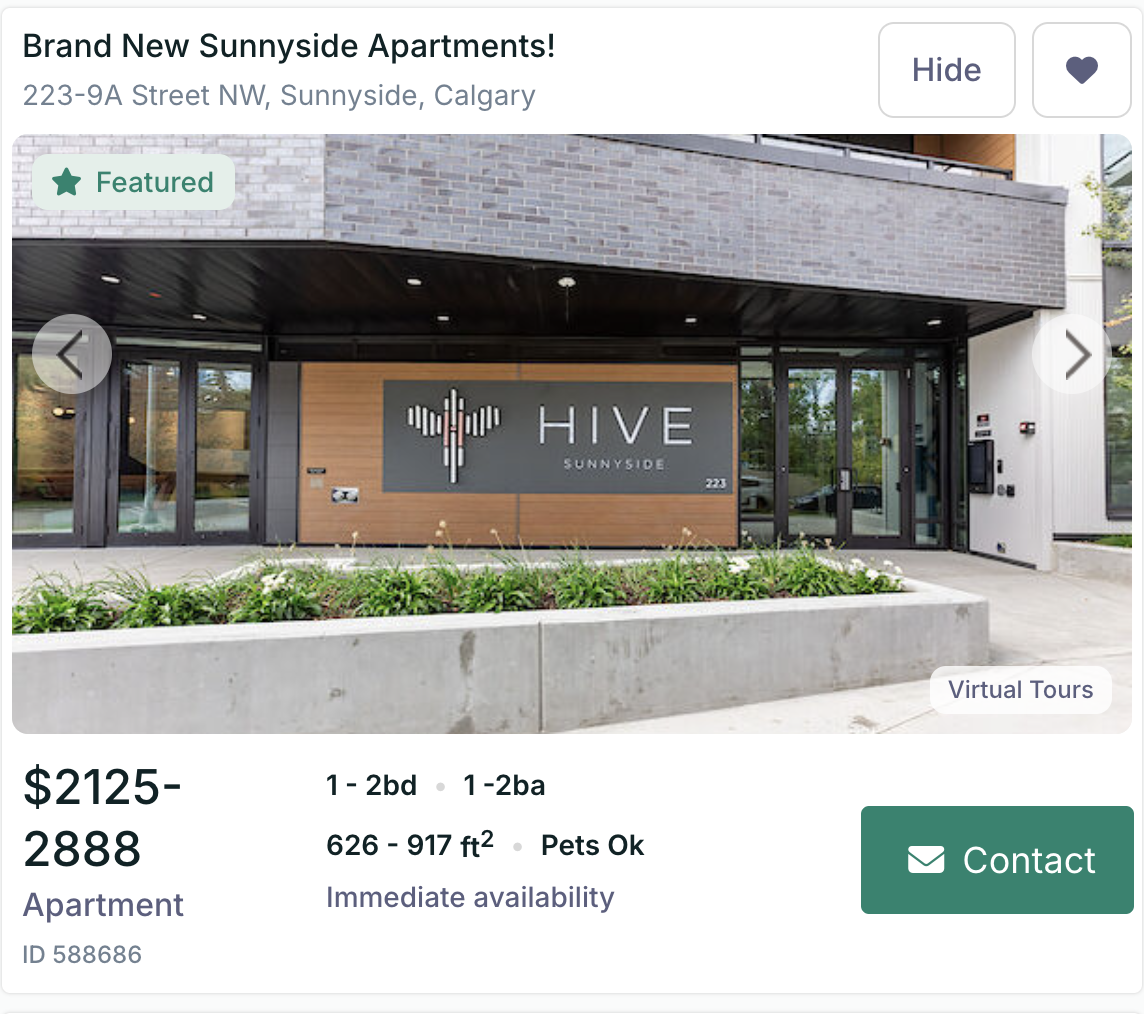

In [343]:
# Define new property features for prediction

new_data = pd.DataFrame({
    'Property': ['SODO (Beltline)', 'Hive (Sunnyside)', 'Modern Beltline'],  # Identifiers
    'beds': [1, 2, 2],  
    'baths': [1, 1.5, 1.5],  # Averaged where range was given  
    'sq_feet': [640, 770, 730],  # Averaged where range was given  
    'latitude': [51.0447, 51.0447, 51.0447],  # Calgary coordinates  
    'longitude': [-114.0719, -114.0719, -114.0719],  
    'type_Apartment': [1, 1, 1],  
    'province_Alberta': [1, 1, 1],  
    'furnishing_Unfurnished': [0, 0, 0],  # Unknown, default to unfurnished  
    'lease_term_Long Term': [1, 1, 1]  # Assume long-term rentals  
})

# Ensure the input matches the training dataset structure
new_data = new_data.reindex(columns=['Property'] + list(X_train.columns), fill_value=0)

# Make predictions using the optimized Random Forest model
predicted_prices = best_model.predict(new_data.drop(columns=['Property']))  # Drop "Property" for prediction

# Add the predictions to the DataFrame
new_data['Predicted Price (CAD)'] = predicted_prices

# Display the predictions
print(new_data[['Property', 'beds', 'baths', 'sq_feet', 'Predicted Price (CAD)']])

           Property  beds  baths  sq_feet  Predicted Price (CAD)
0   SODO (Beltline)     1    1.0      640            1927.662780
1  Hive (Sunnyside)     2    1.5      770            2539.886667
2   Modern Beltline     2    1.5      730            2463.031667


# Conclusion 


In this project, we built and optimized a Random Forest Regression model to predict rental prices across Canada using real-world data. Through Exploratory Data Analysis (EDA), feature engineering, and hyperparameter tuning, we refined our model to achieve reliable predictions.

To evaluate our model’s accuracy, we tested it on three real apartment listings from RentFaster.ca. The model successfully predicted prices that fell within the actual rental price ranges, demonstrating strong generalization capabilities. While some predictions leaned towards the higher end, they remained realistic and aligned with market trends.

Key Takeaways

- Feature Selection & Engineering: Cleaning, encoding, and structuring the dataset properly significantly improved model performance.
- Hyperparameter Tuning: Optimizing Random Forest parameters helped refine predictions, reducing errors compared to default settings.
- Real-World Validation: Using live rental listings validated the model’s effectiveness in predicting realistic rental prices.
- Further Improvements: Fine-tuning with additional features (e.g., amenities, age of the property) or trying advanced models (e.g., Gradient Boosting) could further enhance accuracy.

Final Thoughts

This project demonstrates the power of data science in real estate analytics. With further refinements, this model could be scaled into a full rental price estimation tool for landlords, renters, or real estate professionals.
